In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('email.csv')
df.sample(6)

,Category,Message
3179,ham,K k :-):-) then watch some films.
5272,ham,Hello.How u doing?What u been up 2?When will u...
1392,ham,"Haha just kidding, papa needs drugs"
3443,spam,Save money on wedding lingerie at www.bridal.p...
2624,ham,I'm coming home 4 dinner.
4780,ham,O we cant see if we can join denis and mina? O...


In [56]:
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. avail onli in b..."
1,0,ok lar... joke wif u oni...
2,1,free entri in 2 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor... u c alreadi then say...
4,0,"nah i don't think he goe to usf, he live aroun..."


# 1.Understanding the data

In [4]:
df.shape

(5573, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


# 1. Data Cleaning

In [7]:
df.nunique()

Category       3
Message     5158
dtype: int64

In [8]:
df['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [9]:
df[df['Category']=='{"mode":"full"']

,Category,Message
5572,"{""mode"":""full""",isActive:false}


In [10]:
# In category column "ham" means the email is not a spam and "spam" means the email is spam.
# Since the Category column consist of a Unnecessary value i.e {"mode":"full" so we remove it

In [11]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [12]:
df=df[df['Category']!='{"mode":"full"']

In [13]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [14]:
df.shape

(5572, 2)

### a. Checking for null values

In [15]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [16]:
df['Message'].value_counts()

Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.      

### b. Checking for Duplicate values

In [17]:
df['Message'].duplicated().sum()

415

In [18]:
df=df.drop_duplicates(subset=['Message'])

In [19]:
df['Message'].duplicated().sum()

0

In [20]:
df.shape

(5157, 2)

### Label encoding the "Category" column

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['Category']=encoder.fit_transform(df['Category'])

In [22]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2. EDA

###  PERCENTAGE OF ham(0) and spam(1)

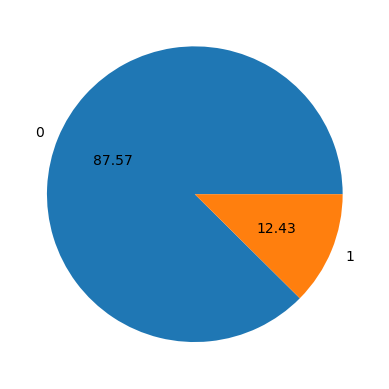

In [23]:
index=df['Category'].value_counts().index
values=df['Category'].value_counts().values
plt.pie(x=values,labels=index,autopct = '%.2f')
plt.show()

In [24]:
# Note : The data set is imbalanced because one class(ham) has significantly more samples than the other class(spam).

### Number of alphabets, sentence ,words are being used in the email

In [25]:
import nltk

In [26]:
nltk.download('punkt')  ## downloading the dependencies

[nltk_data] Downloading package punkt to C:\Users\Prabal
[nltk_data]     Kuinkel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
# Finding the number of characters in each email
def character_length(obj):
    return len(obj)

df['num_characters']=df['Message'].apply(character_length)

In [76]:
# Finding the number of words in each email (using nltk wordtokenizer)
def words(obj):
    l=nltk.word_tokenize(obj)
    return (len(l))

df['num_words']=df['Message'].apply(words)


In [81]:
# Finding the number of sentences in each email (using nltk sentencetokenizer)
def sentence(obj):
    l=nltk.sent_tokenize(obj)
    return (len(l))

df['num_sentence']=df['Message'].apply(sentence)

In [83]:
df.sample(5)

,Category,Message,Characters,num_characters,num_words,num_sentence
2821,1,interflora - it' not too late to order interf...,132,132,24,1
4872,0,well. you know what i mean. text,32,32,9,3
3875,0,no. did you multimedia messag them or e-mail?,45,45,10,2
4768,1,your uniqu user id is 1172. for remov send sto...,82,82,15,1
1123,0,ok.ok ok..then..what ur today plan,34,34,9,1


In [85]:
df.describe()

,Category,Characters,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,75.708939,75.708939,18.563894,1.892767
std,0.329952,55.821112,55.821112,13.386220,1.384813
min,0.000000,2.000000,2.000000,1.000000,1.000000
25%,0.000000,34.000000,34.000000,9.000000,1.000000
50%,0.000000,58.000000,58.000000,15.000000,1.000000
75%,0.000000,112.000000,112.000000,26.000000,2.000000
max,1.000000,866.000000,866.000000,216.000000,34.000000


In [93]:
# Analyzing the "ham" datas
df[df['Category']==0].describe()

,Category,Characters,num_characters,num_words,num_sentence
count,4516.0,4516.000000,4516.000000,4516.000000,4516.000000
mean,0.0,67.777679,67.777679,17.287644,1.757750
std,0.0,54.123604,54.123604,13.581152,1.324024
min,0.0,2.000000,2.000000,1.000000,1.000000
25%,0.0,32.000000,32.000000,8.000000,1.000000
50%,0.0,50.000000,50.000000,13.000000,1.000000
75%,0.0,88.000000,88.000000,22.000000,2.000000
max,0.0,866.000000,866.000000,216.000000,34.000000


In [ ]:
# Observation: The mean number of characters , words and sentence for ham message is: 68,17,2

In [92]:
# Analyzing the "spam" datas
df[df['Category']==1].describe()

,Category,Characters,num_characters,num_words,num_sentence
count,641.0,641.000000,641.000000,641.000000,641.000000
mean,1.0,131.586583,131.586583,27.555382,2.843994
std,0.0,29.435243,29.435243,7.065352,1.430908
min,1.0,7.000000,7.000000,2.000000,1.000000
25%,1.0,125.000000,125.000000,25.000000,2.000000
50%,1.0,142.000000,142.000000,29.000000,3.000000
75%,1.0,151.000000,151.000000,32.000000,4.000000
max,1.0,211.000000,211.000000,46.000000,9.000000


In [94]:
# Observation: The mean number of characters , words and sentence for spam message is: 131,27,3

In [95]:
# Note 1: we can observe that spam messgae are longer than ham messages

<Axes: xlabel='num_characters', ylabel='Count'>

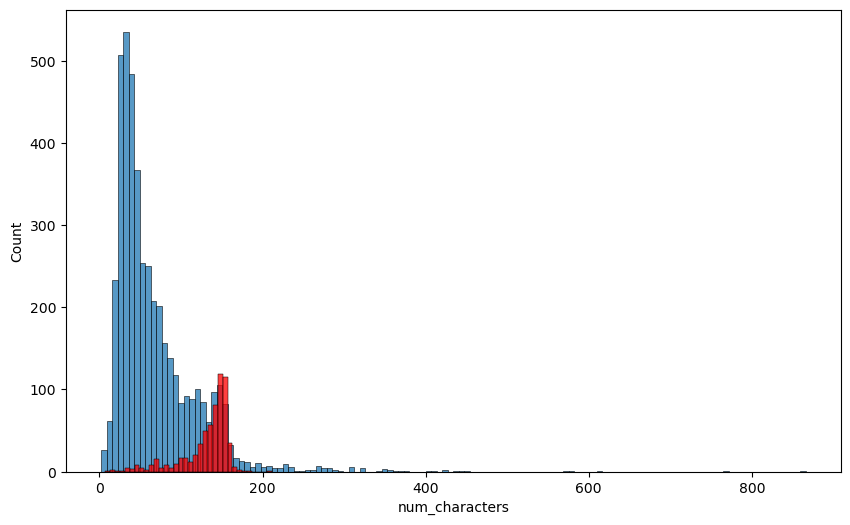

In [112]:
# Similarily we can observe the same above (the number of characters in ham and spam using histogram)
plt.figure(figsize=(10,6))
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='red')
# The number of characters being used in spam is more than in ham

In [116]:
df[['num_characters','num_words','num_sentence']].corr()

,num_characters,num_words,num_sentence
num_characters,1.000000,0.968456,0.610134
num_words,0.968456,1.000000,0.656587
num_sentence,0.610134,0.656587,1.000000


# Converting all the text in 'Message' column to Lower case

In [28]:
def lowercase(obj):
    return obj.lower()

In [29]:
df['Message']=df['Message'].apply(lowercase)

In [30]:
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


# Steaming the data 

In [31]:
from nltk.stem import PorterStemmer

In [32]:
ps= PorterStemmer()

In [33]:
def steamming(obj):
    l=[]
    for i in obj.split(" "):  # to convert the string to list so that steaing can be done to each word
        l.append(ps.stem(i))  # applying steaming to each word 
        
    return (" ".join(l)) # after steaming returning the list as string 
        
   
    

In [34]:
df['Message']=df['Message'].apply(steamming)

In [35]:
df

,Category,Message
0,0,"go until jurong point, crazy.. avail onli in b..."
1,0,ok lar... joke wif u oni...
2,1,free entri in 2 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor... u c alreadi then say...
4,0,"nah i don't think he goe to usf, he live aroun..."
...,...,...
5567,1,thi is the 2nd time we have tri 2 contact u. u...
5568,0,will ü b go to esplanad fr home?
5569,0,"pity, * wa in mood for that. so...ani other su..."
5570,0,the guy did some bitch but i act like i'd be i...


# Text vectorization Applying the TFIDF 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
len(df['Message'])

5157

In [38]:
vc = TfidfVectorizer(stop_words='english',max_features=10000)

In [39]:
x=vc.fit_transform(df['Message']).toarray()

In [40]:
y=df['Category']

In [41]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

# Train_test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [45]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y_train

2792    0
757     0
1929    1
5399    0
4502    0
       ..
4750    0
474     1
3273    0
4022    0
882     0
Name: Category, Length: 4641, dtype: int32

In [48]:
y_test

3031    0
495     0
2942    0
3911    0
3360    1
       ..
1941    0
3688    0
2361    0
4874    0
3617    0
Name: Category, Length: 516, dtype: int32

# Training the model using logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_predict_lr=lr.predict(x_test)
y_predict_lr

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# Training the model using Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [53]:
y_predict_mnb=mnb.predict(x_test)
y_predict_mnb

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# Checking the Accuracy,precision and Confusion matrix of the model

In [54]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix


In [55]:
print('Logistic Regression \n')
acc_score_lr = accuracy_score(y_test,y_predict_lr)
pre_score_lr = precision_score(y_test,y_predict_lr,pos_label='spam')
con_matrix_lr = confusion_matrix(y_test,y_predict_lr)

print("Accuracy : ",acc_score_lr*100)
print('Precision : ',pre_score_lr*100)
print("Confusion Matrix : \n",con_matrix_lr)

Logistic Regression 



ValueError: pos_label=spam is not a valid label. It should be one of [0, 1]

In [ ]:
print('Multinominal Naive Bayes \n')
acc_score_mnb = accuracy_score(y_test,y_predict_mnb)
pre_score_mnb = precision_score(y_test,y_predict_mnb,pos_label='spam')
con_matrix_mnb = confusion_matrix(y_test,y_predict_mnb)

print("Accuracy : ",acc_score_mnb*100)
print('Precision : ',pre_score_mnb*100)
print("Confusion Matrix : \n",con_matrix_mnb)

In [ ]:
def test(str):
    arr=vc.transform([str]).toarray()
    return arr

str="Subject: Invitation to a Team Meeting Dear Team, I hope this email finds you well. We are scheduling a team meeting for next Monday to discuss the upcoming project. Your presence and input would be highly valuable.Date: Monday, May 10th Time: 10:00 AM Location: Conference Room 2 Agenda: 1. Project goals and objectives 2. Task allocation 3. Deadlines Please confirm your availability for the meeting.Looking forward to seeing you all there.Best regards, Prabal Kuinkel"
arr=test(str)
print(arr)

In [ ]:
print('Prediction using Logistic Regression: ')
print(lr.predict(arr),"\n\n")

print('Prediction using Multinominal Naive Bayes: ')
print(mnb.predict(arr))

In [ ]:
# Best is of MNB
